# CAMS data demo
3x3 pixels around each city for CAMS gloabl dataset

## Introduction

This notebook demonstrates opening and plotting data from two data sets:
 - CAMS Global reanalysis (EA4C)
 - CAMS European air quality Reanalysis 

The data have been extracted for each city as 3 by 3 pixel 'chips'
 
###  CAMS Global reanalysis (EA4C)
Available from 2003 to June 2022 (continues to be updated)
0.75 degrees Horizontal resolution
3 hourly temopral resolution


In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

## The Harmonia cities

In [2]:
cities = ['Piraeus', 'Ixelles', 'Sofia', 'Milan']
# Chose one of the cities above
city = 'Piraeus'

## Open the dataset for the chosen city

get an xarray containing the data

In [3]:
data_dir = "data/by_city_chunck/cams_global_reanalysis_eac4/"
path = Path(data_dir, city)
# The data are in multiple files, one per year. We can open them all together
files = f"{path}/cams_global_reanalysis_concentrations_*.nc"

# Open the data as an xarray
data = xr.open_mfdataset(files)

### Quick look at variables in the data set

In [4]:
# List the variables available in the data set
variables = list(data.keys())
print("Available variables: \n", variables)

# and the metadata for one of the variables
print("\n metadata for co: \n",data['co'].attrs)

# Latitudes and longitudes
print("\n Latitudes: ", data.latitude.values)
print("\n Longitudes: ", data.longitude.values)

Available variables: 
 ['co', 'no2', 'no', 'go3', 'pan', 'so2', 'pm10', 'pm2p5']

 metadata for co: 
 {'units': 'ug m**-3', 'long_name': 'Carbon monoxide mass concentration', 'standard_name': 'mass_concentration_of_carbon_monoxide_in_air'}

 Latitudes:  [39.   38.25 37.5 ]

 Longitudes:  [23.25 24.   24.75]


### A closer look at the variables in the data set
Print the metadata for all of the variables \
The concentrations are in $\mu \text{g}\, \text{m}^{-3}$

In [5]:
# List the variables available in the data set
print(f"Available variables: {variables}\n")
print(f"Name  : (units)     Long name                            Standard name")
print(f"----------------------------------------------------------------------------------------")
for var in data.keys():
    spaces1 = ' '*(9 - len(data[var].attrs['units']))
    spaces2 = ' '*(35 - len(data[var].attrs['long_name']))
    print(f"{var:6}: ({data[var].attrs['units']}){spaces1} {data[var].attrs['long_name']} {spaces2}: ({data[var].attrs['standard_name']})")


Available variables: ['co', 'no2', 'no', 'go3', 'pan', 'so2', 'pm10', 'pm2p5']

Name  : (units)     Long name                            Standard name
----------------------------------------------------------------------------------------
co    : (ug m**-3)  Carbon monoxide mass concentration  : (mass_concentration_of_carbon_monoxide_in_air)
no2   : (ug m**-3)  Nitrogen dioxide mass concentration : (mass_concentration_of_nitrogen_dioxide_in_air)
no    : (ug m**-3)  Nitrogen monoxide mass concentration : (mass_concentration_of_nitrogen_monoxide_in_air)
go3   : (ug m**-3)  Ozone mass concentration (full chemistry scheme) : (mass_concentration_of_ozone_in_air)
pan   : (ug m**-3)  Peroxyacetyl nitrate                : (mass_concentration_of_peroxyacetyl_nitrate_in_air)
so2   : (ug m**-3)  Sulphur dioxide mass concentration  : (mass_concentration_of_sulfur_dioxide_in_air)
pm10  : (ug m**-3)  Particulate matter d <= 10 um       : (mass_concentration_of_pm10_ambient_aerosol_particles_in_air)

## Plot timeseries of concentrations for the city

In [6]:
# formatted Labels for plots
labels = {'pm10':r"PM$_{10}$",
          'pm2p5':r"PM$_{2.5}$",
          'co': "CO",
          'no2': r"NO$_{2}$",
          'no': "NO",
          'go3': r"Ground Ozone", 
          'pan': "PAN",
          'so2': r"SO$_{2}$"}
# and for units
unit = r"$\mu g \ m ^{-3}$" 

### Plot the whole timeseries

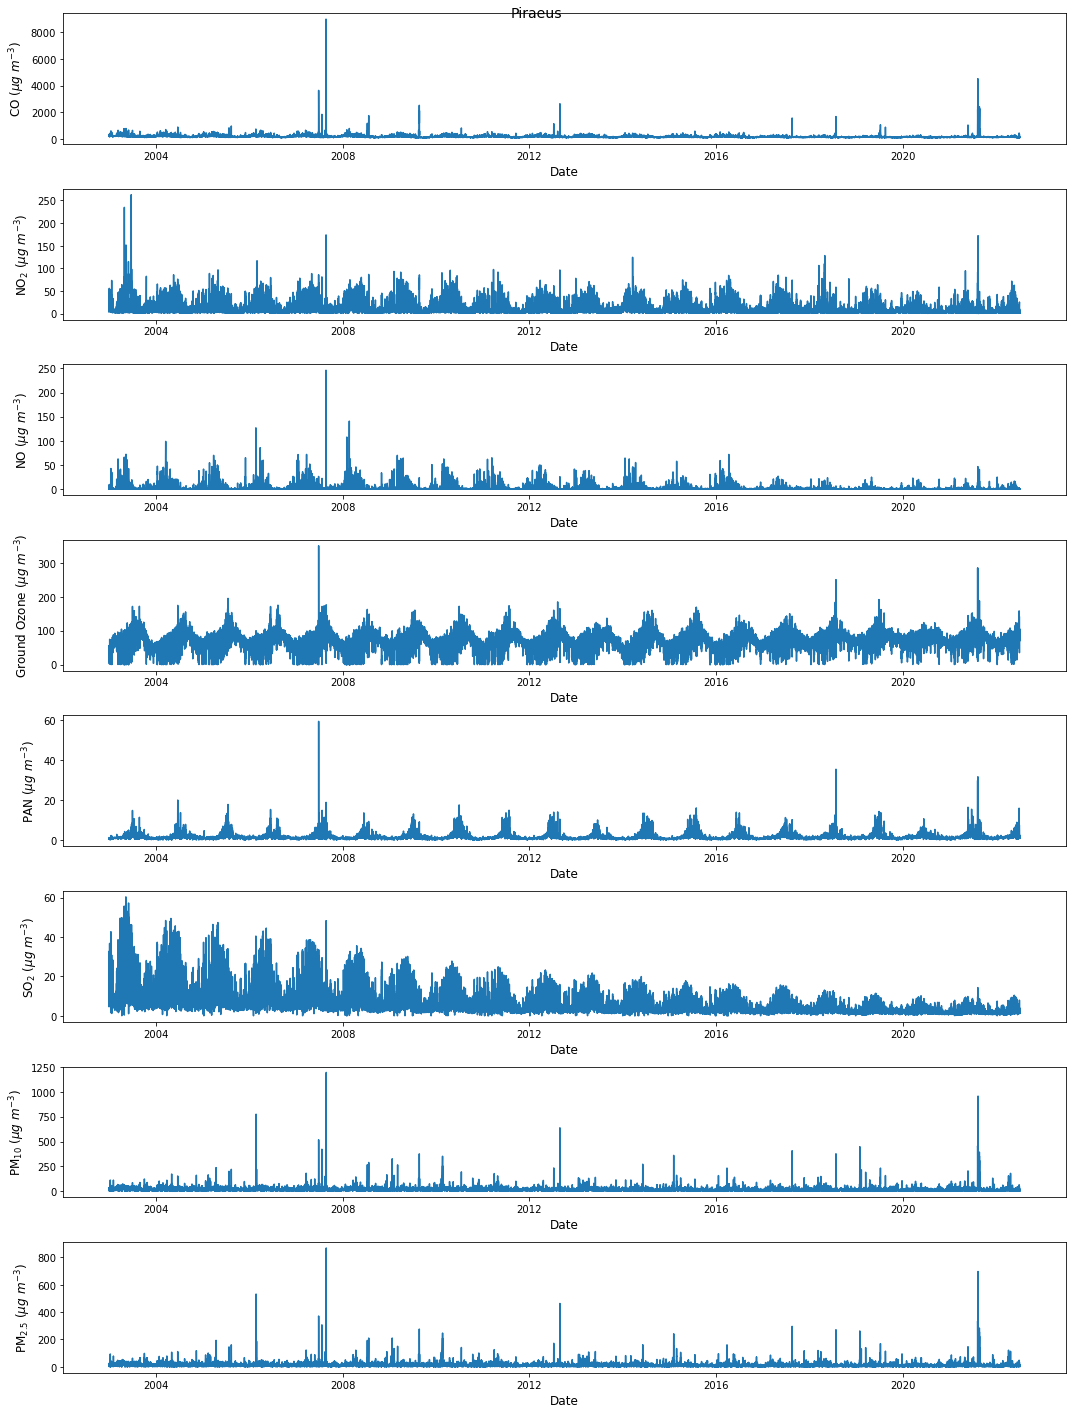

In [7]:
fig, axs = plt.subplots(len(variables), 1, figsize = (15, 20))

# Get one pixel
point = data.isel({'latitude':1, 'longitude':1})

for ax, variable in zip(axs.flatten(), variables):
    ax.plot(point.time, point[variable])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)
    ax.set_xlabel("Date", size=12)

fig.suptitle(city, fontsize=14)
fig.tight_layout()

### Plot data for one year

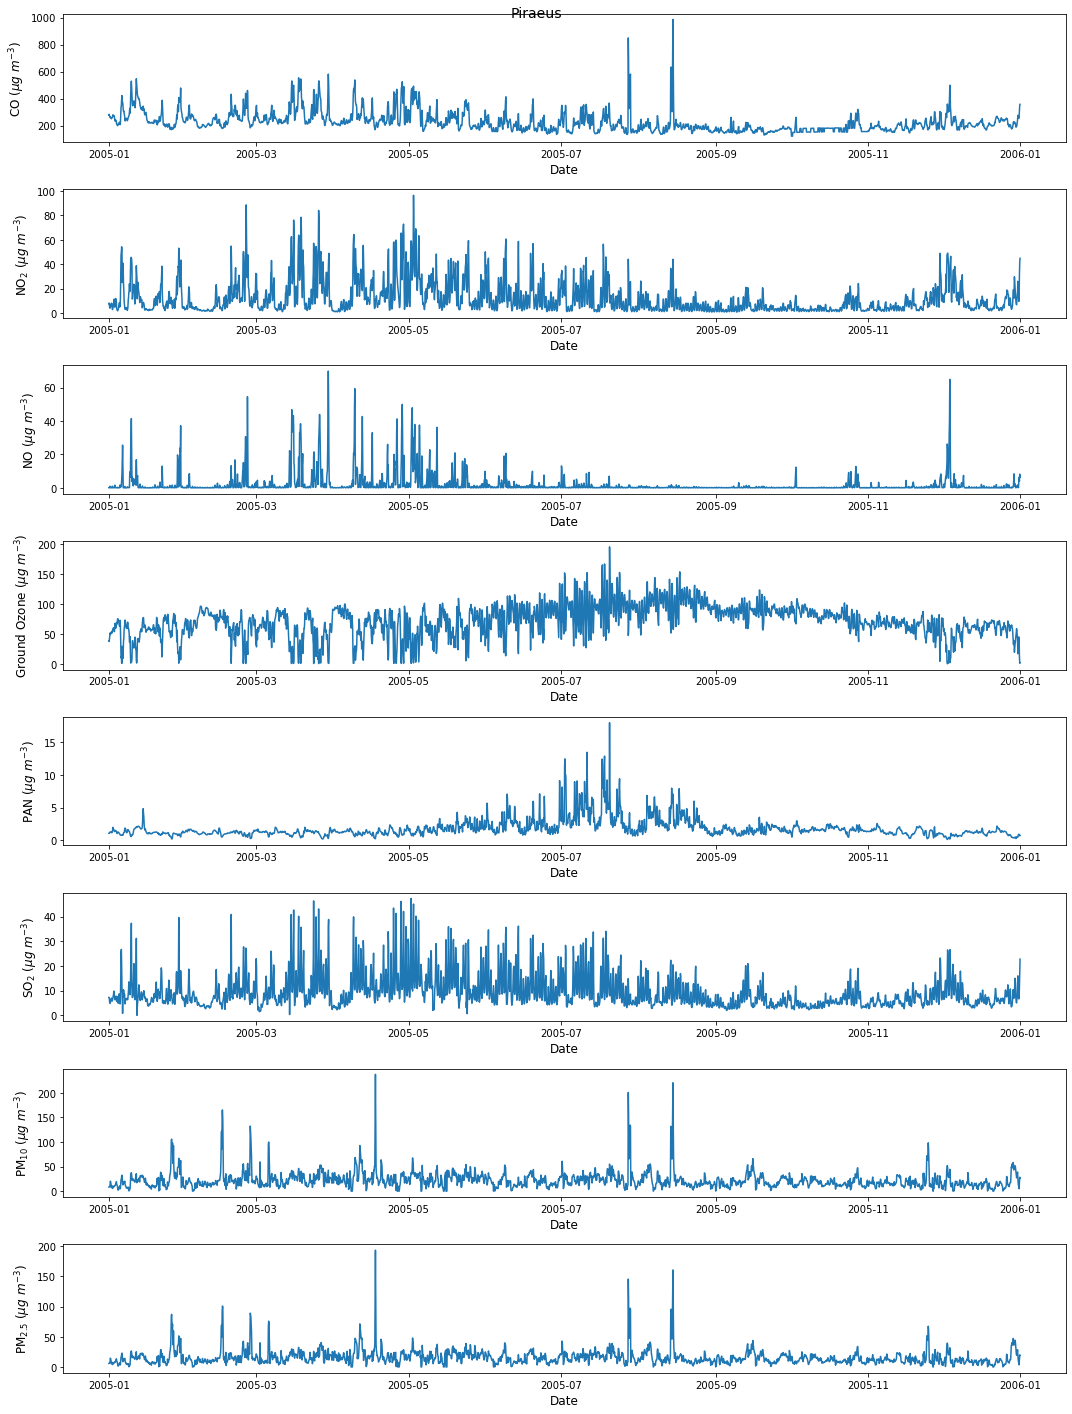

In [8]:
year = 2005

in_year = data.time.dt.year == year
# pull out the centre pixel
point = data.isel({'latitude':1, 'longitude':1})

fig, axs = plt.subplots(len(variables), 1, figsize = (15, 20))
for ax, variable in zip(axs.flatten(), variables):
    ax.plot(point.time[in_year], point[variable][in_year])
    ax.set_ylabel(f"{labels[variable]} ({unit})", size=12)
    ax.set_xlabel("Date", size=12)

fig.suptitle(city, fontsize=14)
fig.tight_layout()